In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Your Group ID').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"

In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018")
########## ONLY in Colab ##########

In [ ]:
# Print DF to make sure it is working
IDS_df.show()

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+------------+-----------+---------------+--------------+-------------+-------------+----------------+-------------+-------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

In [ ]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|5329914|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+



 **Creating view of the dataset IDS_2018**

In [ ]:
# Creating view (virtual table) of the dataset IDS_2018 for making query
IDS_df.createOrReplaceTempView("table") 
sqlDF = spark.sql("SELECT * FROM table") 
sqlDF.show(truncate=False)


+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+------------+-----------+---------------+--------------+-------------+-------------+----------------+-------------+-------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

# **Query 1: Counting Network attacks between the timespan 08:00 to 12:00(Numerical Representation)**










In [ ]:

# Spark Sql query to calculate count of each network attack, total attack and displaying Lebels in between the timespan 08:00 to 12:00 in ascending order
# Timestamp and Label fields are extracted from the dataset for this query
# Spark sql analytical functions SUM(),COUNT(), alias names, WHERE,OVER,GROUP BY, ORDER BY clauses, String function SUBSTRING() are used in this query
# Finally numerical data is represented in understandable tabular format

sqlDF = spark.sql("SELECT Label AS Name_of_Network_Attacks, COUNT(Label) AS Count_of_Each_Attack, SUM(COUNT(Label)) OVER() AS Total_Attack FROM table WHERE SUBSTRING (timestamp, 12, 8) BETWEEN '08:00' and '12:00' GROUP BY Label ORDER BY Label ASC")
sqlDF.show(truncate=False)


+------------------------+--------------------+------------+
|Name_of_Network_Attacks |Count_of_Each_Attack|Total_Attack|
+------------------------+--------------------+------------+
|Benign                  |2222183             |2704892     |
|Bot                     |113596              |2704892     |
|Brute Force -Web        |611                 |2704892     |
|DDOS attack-LOIC-UDP    |1730                |2704892     |
|DoS attacks-GoldenEye   |41508               |2704892     |
|DoS attacks-SlowHTTPTest|139890              |2704892     |
|DoS attacks-Slowloris   |10990               |2704892     |
|FTP-BruteForce          |174380              |2704892     |
|SQL Injection           |4                   |2704892     |
+------------------------+--------------------+------------+



**Graphical Representation 1**

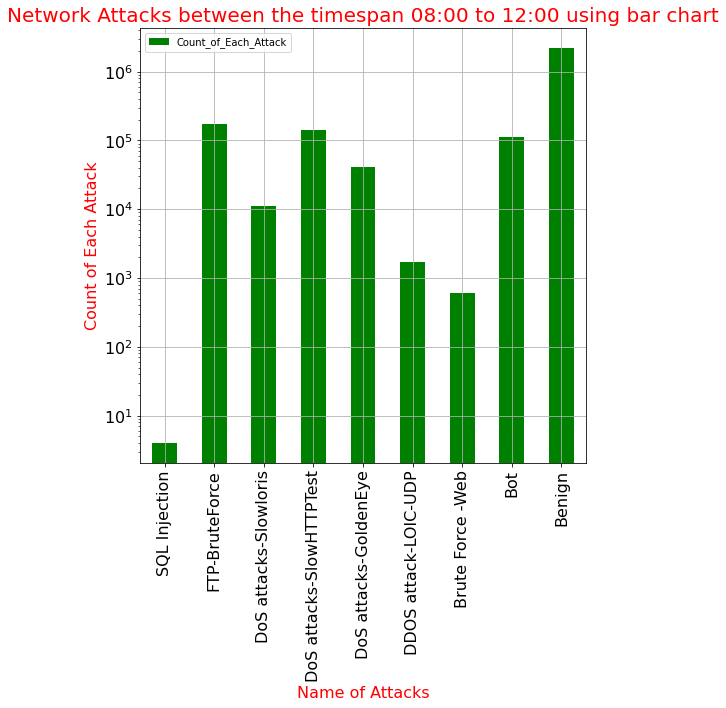

In [ ]:
#plotting the Name_of_Network_Attacks vs Count_of_Each_Attack using matplotlib, pandas and bar chart
#Benign is highest attack and Sql injection is the lowest attack between the timespan 08:00 to 12:00

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#converting Sql dataframe to pandas dataframe to implement the graphical reprentation 
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='Name_of_Network_Attacks',ascending=False).plot(x ='Name_of_Network_Attacks', y='Count_of_Each_Attack',kind = 'bar',logy=True,color='green',figsize=(8,8))
plt.title('Network Attacks between the timespan 08:00 to 12:00 using bar chart',fontsize=20,color='red')
plt.xlabel('Name of Attacks',fontsize=16,color='red')
plt.ylabel('Count of Each Attack',fontsize=16,color='red')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid("True")
plt.show()


**Graphical Representation 2**

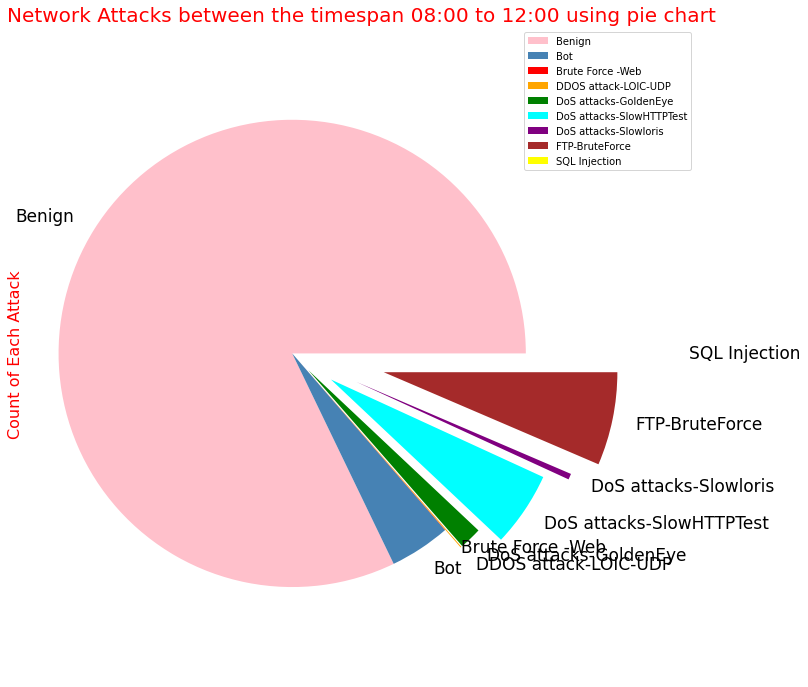

In [ ]:
# Plotting the count of network attacks between the timespan 08:00 to 12:00 using pie chart
# Benign is highest attack and Sql injection is the lowest attack between the timespan 08:00 to 12:00

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating arrays, indexes of Label names, values
attack_names = ['Benign', 'Bot', 'Brute Force -Web', 'DDOS attack-LOIC-UDP', 'DoS attacks-GoldenEye', 'DoS attacks-SlowHTTPTest', 
               'DoS attacks-Slowloris ', 'FTP-BruteForce', 'SQL Injection']

# series(one dimensional array) to hold integer and String values
# index is the axis label   
count_names = pd.Series([2222183, 113596, 611 , 1730, 41508, 139890, 10990, 174380,4], 
                   index=['Benign', 'Bot', 'Brute Force -Web', 'DDOS attack-LOIC-UDP',
                          'DoS attacks-GoldenEye', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris', 'FTP-BruteForce', 'SQL Injection'])
plt.figure(figsize=(12,12))

# explode is used to represent each slices of pie chart with respect to numeric proportion
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6)
colors = ['pink', 'steelblue', 'red', 'orange', 'green', 'cyan', 'purple','brown', 'yellow']
count_names.plot(kind='pie', fontsize=17, colors=colors, explode=explode)
plt.axis('equal')
plt.title('Network Attacks between the timespan 08:00 to 12:00 using pie chart',fontsize=20,color='red')
plt.ylabel('Count of Each Attack',fontsize=16,color='red')
plt.legend(labels=count_names.index, loc="best")
plt.show()


# **Query 2: Estimating the Flow duration of Forward and Backward packets for more than 1000 Network Attacks(Numerical Representation)**

In [ ]:

# Spark sql query to calculate the average  flow duration,sum of total forward and backward packets per second and displaying more than 1000 count of network attacks in ascending order
# Spary sql analytical functions avg(),ceil(), HAVING,WHERE,GROUP BY,ORDER BY clauses, alias names are used in this query  

sqlDF = spark.sql("SELECT Label AS Network_attacks, ceil(avg(Flow_Duration)) AS Average_Flow_Duration, ceil(sum(Fwd_Pkts_s)) AS Total_Forward_Packets_persecond, ceil(sum(Bwd_Pkts_s)) As Total_Backward_packets_persecond,  count(*) AS Count_of_network_attacks FROM table GROUP BY Label HAVING count(*) > 1000 ORDER BY Label ASC") 
sqlDF.show(truncate=False)

+------------------------+---------------------+-------------------------------+--------------------------------+------------------------+
|Network_attacks         |Average_Flow_Duration|Total_Forward_Packets_persecond|Total_Backward_packets_persecond|Count_of_network_attacks|
+------------------------+---------------------+-------------------------------+--------------------------------+------------------------+
|Benign                  |13173529             |125340970179                   |14816942707                     |5329914                 |
|Bot                     |75299                |588628129                      |51447631                        |286191                  |
|DDOS attack-HOIC        |9721                 |513804174                      |136790917                       |686012                  |
|DDOS attack-LOIC-UDP    |116018170            |1865191                        |0                               |1730                    |
|DoS attacks-GoldenEye   |1

**Graphical Representation 1**

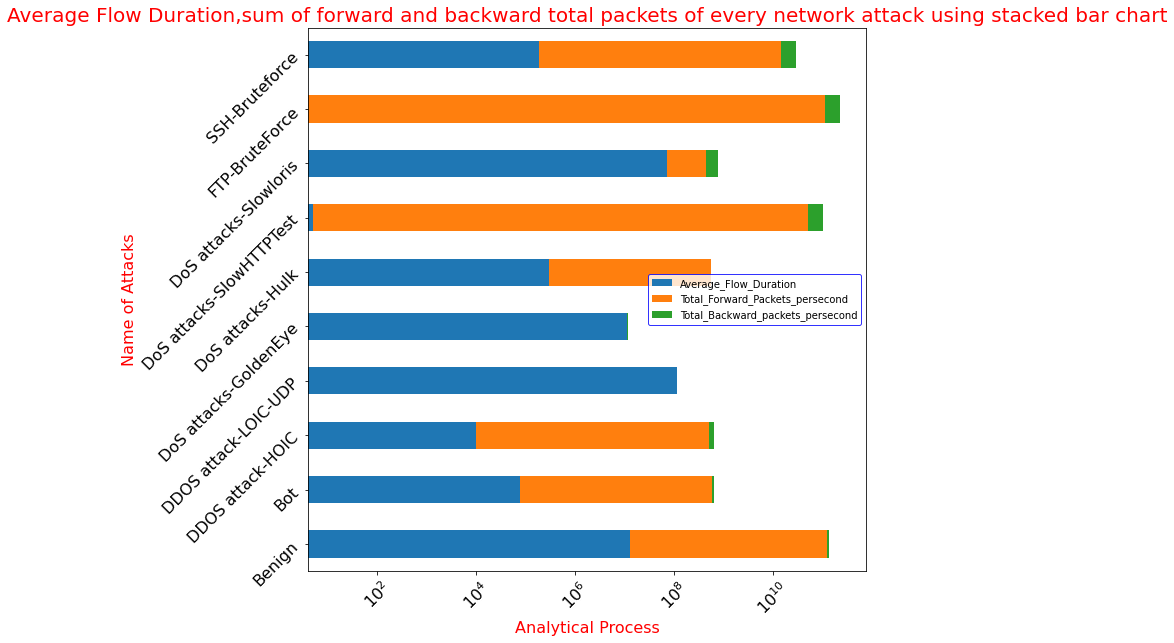

In [ ]:
# plotting the average flow duration,sum of total forward and backward packets per second for more than 1000 count of network attacks using stacked bar chart
# FTP-BruteForce  has lowest average flow duration, but DDOS attack-LOIC-UDP has the highest average flow duration  
import pandas as pd
import matplotlib.pyplot as plt

#creating data dictionary
sqlDF1 = pd.DataFrame({'Network_attacks': ['Benign','Bot','DDOS attack-HOIC','DDOS attack-LOIC-UDP','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris','FTP-BruteForce','SSH-Bruteforce'],
                   'Average_Flow_Duration': [13173529  ,75299,9721,116018170,11233441  ,301756,5,71980337,4 ,183350 ],
                   'Total_Forward_Packets_persecond': [125340970179 ,588628129,513804174 ,1865191,217065 ,556095426  ,51388598109 ,374104633,114964470648, 14875391761],
                   'Total_Backward_packets_persecond': [14816942707 ,51447631,136790917,0,145249 ,2189674 ,51388598109  ,343453825,114964470648,14861428995 ],
                    })

#creating stacked bar chart

sqlDF1[['Network_attacks', 'Average_Flow_Duration', 'Total_Forward_Packets_persecond', 'Total_Backward_packets_persecond']].plot(x='Network_attacks', kind='barh',logx=True, stacked=True,figsize=(10,10))
plt.title('Average Flow Duration,sum of forward and backward total packets of every network attack using stacked bar chart',fontsize=20,color='red')
plt.xlabel('Analytical Process',fontsize=16,color='red')
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)
plt.ylabel('Name of Attacks',fontsize=16,color='red')
plt.legend(loc="center right",fontsize=10,edgecolor='blue')
plt.show()

**Graphical Representation 2**

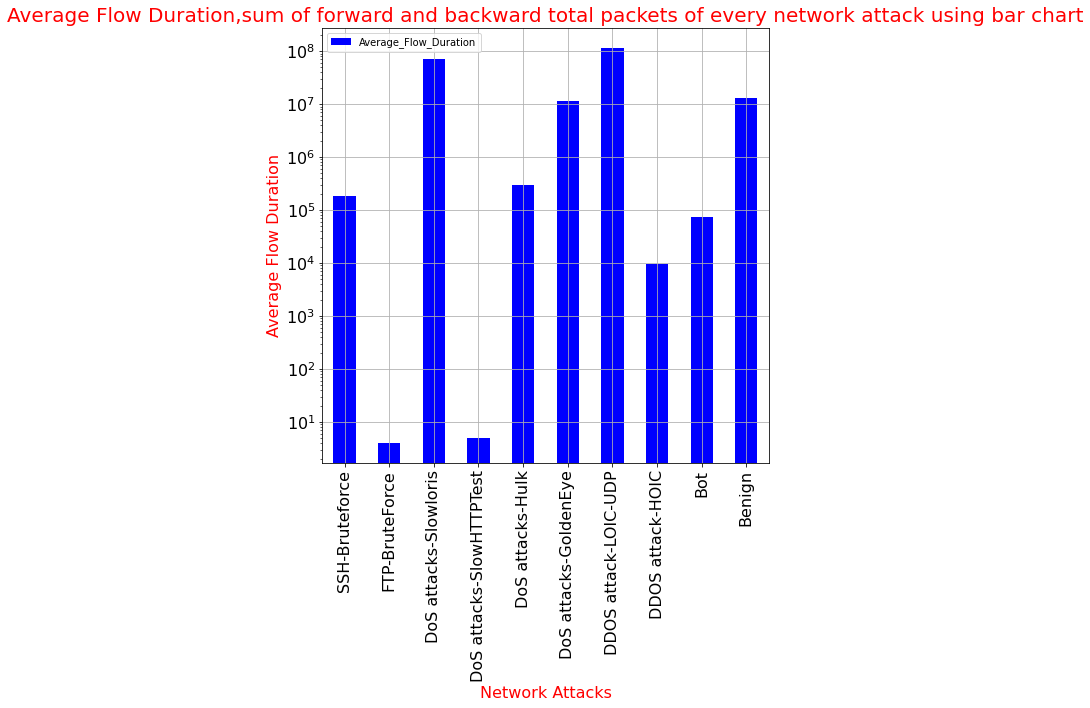

In [ ]:
#plotting the average flow duration,sum of total forward and backward packets per second for more than 1000 count of network attacks using bar chart
#FTP-BruteForce  has lowest average flow duration, but DDOS attack-LOIC-UDP has the highest average flow duration 

import matplotlib.pyplot as plt 
import pandas as pd

# Converting sql dataframe to pandas dataframe
pandas_df = sqlDF.toPandas()          
pandas_df.sort_values(by='Network_attacks',ascending=False).plot(x ='Network_attacks', y='Average_Flow_Duration',logy=True,kind = 'bar',color='blue',figsize=(8,8))
plt.title('Average Flow Duration,sum of forward and backward total packets of every network attack using bar chart',fontsize=20,color='red')
plt.xlabel('Network Attacks',fontsize=16,color='red')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('Average Flow Duration',fontsize=16,color='red')
plt.grid("True")
plt.show()


**The average flow duration of each network attack (Graphical Representation 2)**

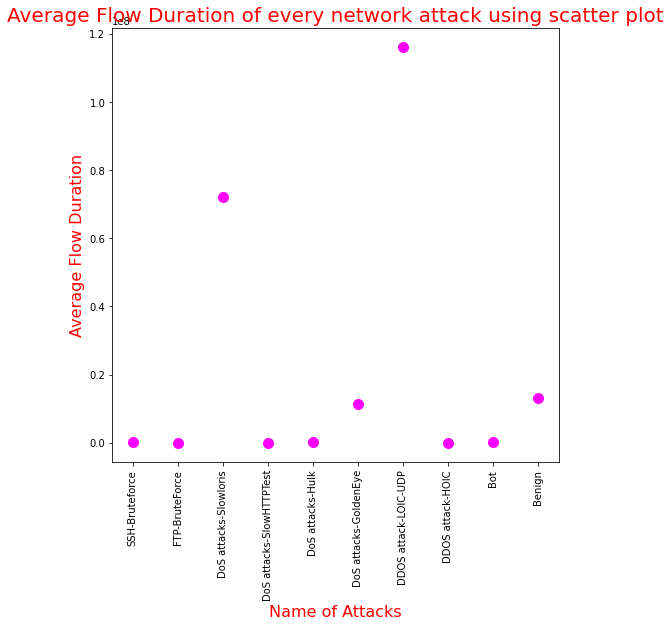

In [ ]:
#plotting the average flow duration of each network attack using scatter chart

import matplotlib.pyplot as plt 
import pandas as pd

pandas_df = sqlDF.toPandas()          
pandas_df.sort_values(by='Network_attacks',ascending=False).plot(x ='Network_attacks', y='Average_Flow_Duration',kind = 'scatter',color='magenta',s=100,figsize=(8,8))
plt.title('Average Flow Duration of every network attack using scatter plot',fontsize=20,color='red')
plt.xlabel('Name of Attacks',fontsize=16,color='red')
plt.xticks(rotation=90)
plt.ylabel('Average Flow Duration',fontsize=16,color='red')
plt.show()


**Dropping Null Values from the dataset to make it ready for data analysis**

In [ ]:
#Dropping Null Values from the dataset to make it ready for data analysis

IDS_df = IDS_df.na.drop()
IDS_df.show(truncate=False)

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+------------+-----------+---------------+--------------+-------------+-------------+----------------+-------------+-------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

In [ ]:
# Selected Columns from the dataset to analyze the data

IDS_df1=IDS_df.select('Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts','Fwd_Pkts_s')
IDS_df1.show()

+------------+------------+---------------+---------------+-----------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts| Fwd_Pkts_s|
+------------+------------+---------------+---------------+-----------+
|           3|           0|              0|              0|0.026633116|
|           3|           0|              0|              0|0.026633176|
|           3|           0|              0|              0|0.026633848|
|          15|          10|           1239|           2273|2.324152312|
|          14|          11|           1143|           2209|1.590174358|
|          16|          12|           1239|           2273|2.289200083|
|           3|           0|              0|              0|0.026633409|
|           3|           0|              0|              0|0.026633229|
|           5|           3|            211|            463|10.49289316|
|           5|           3|            220|            472|10.52525219|
|           5|           3|            220|            472|10.52

**First Approach of Analytical method 1(Numerical Representation)**
# Summary(Measures of Location) of network packets in the forward and backward direction
                                                                              





In [ ]:
# Student 2 name and ID : MOUSUMI CHAUDHURY  2100308
# Analytical method 1:
#Calculating descriptive statistics(Measures of Location) of the whole dataset based on total and total size of packets in the forward and backward direction  and visualizing using panda library
#Standard deviation is the square root of the variance
# It is a measure of spread

import pandas as pd

df1=IDS_df.select('Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts').summary().toPandas()
df1



,summary,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts
0,count,7340024,7340024,7340024,7340024
1,mean,32.9435801572311,5.961681869160101,1293.6388206632566,4608.406702212418
2,stddev,1854.0585200694272,171.3251794205229,60613.49957683418,244707.2784098383
3,min,1,0,0,0
4,25%,2.0,0.0,0.0,0.0
5,50%,2.0,1.0,43.0,93.0
6,75%,5.0,4.0,757.0,364.0
7,max,99983,999,9999,99996


**First Approach of Analytical method 1(Graphical Representation 1)**

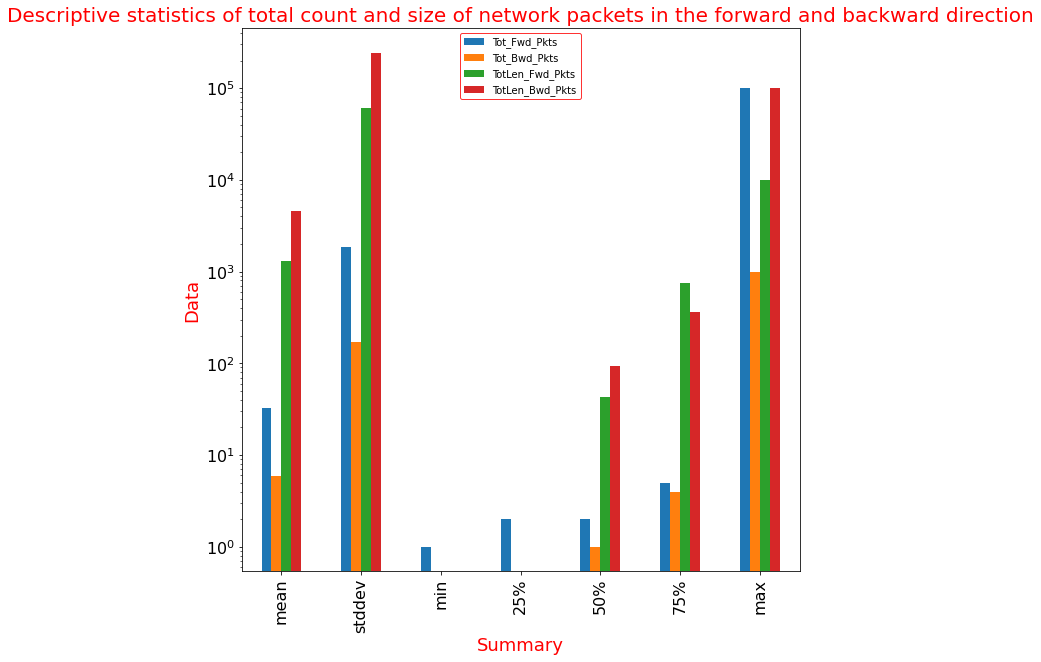

In [ ]:
 # Plotting graphically the descriptive statistics of IDS_2018 dataset using matplotlib and numpy library

import pandas as pd
import matplotlib.pyplot as plt

#create data dictionary
df1 = pd.DataFrame({'summary': ['mean', 'stddev', 'min', '25%','50%', '75%','max'],
                   'Tot_Fwd_Pkts': [ 32.9435801572311, 1854.0585200694272,1, 2.0, 2.0 	, 5.0 	, 99983],
                   'Tot_Bwd_Pkts': [ 5.961681869160101, 171.3251794205229 	, 0 , 0.0 , 1.0 , 4.0 , 999 ],
                   'TotLen_Fwd_Pkts': [1293.6388206632566, 60613.49957683418, 0, 0.0, 43.0, 757.0 , 9999],
                   'TotLen_Bwd_Pkts': [4608.406702212418,244707.2784098383,0,0.0,93.0,364.0,99996]})

index=['Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts']


#plot columns on bar chart
df1[['summary', 'Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts']].plot(x='summary', kind='bar',logy=True,figsize=(10,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Summary', fontsize=18,color='red')
plt.ylabel('Data', fontsize=18,color='red')
plt.title('Descriptive statistics of total count and size of network packets in the forward and backward direction',fontsize=20,color='red')
plt.legend(index,loc="upper center",fontsize=10,edgecolor='red')
plt.show()

**Graphical Representation 2**

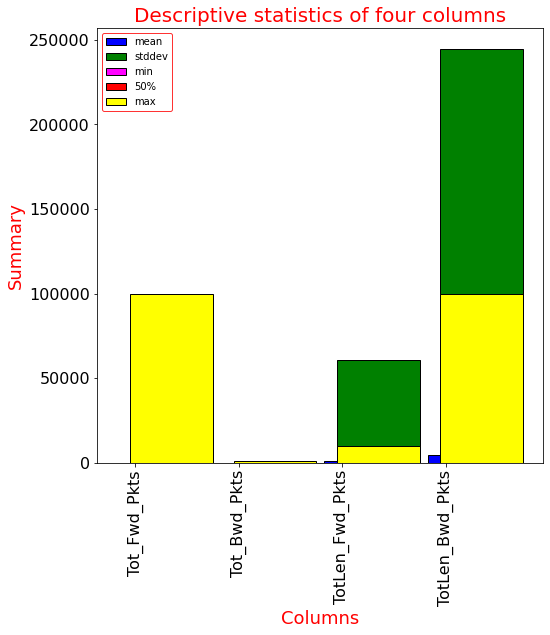

In [ ]:
# Plotting graphically the descriptive statistics of IDS_2018 dataset using matplotlib and numpy library

import matplotlib.pyplot as plt
import numpy as np

# Creating dictionaries with the descriptive summary
fields=['Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts']
summary=['mean','stddev','min','50%','max','count']
pos = np.arange(len(fields))
bar_width = 0.35
mean_Index=[32.9435801572311,5.961681869160101,1293.6388206632566,4608.406702212418]
stddev_Index=[1854.0585200694272,171.3251794205229,60613.49957683418,244707.2784098383]
min_Index=[1,0,0,0]
p1=[2.0,1.0,43.0,93.0]
max_Index=[99983,999,9999,99996]

plt.figure(figsize=(8,8))
plt.bar(pos,mean_Index,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,stddev_Index,color='green',edgecolor='black')
plt.bar(pos+bar_width,min_Index,color='magenta',edgecolor='black')
plt.bar(pos+bar_width,p1,color='red',edgecolor='black')
plt.bar(pos+bar_width,max_Index,color='yellow',edgecolor='black')
plt.xticks(pos, fields,fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Columns', fontsize=18,color='red')
plt.ylabel('Summary', fontsize=18,color='red')
plt.title('Descriptive statistics of four columns',fontsize=20,color='red')
plt.legend(summary,loc=2,fontsize=10,edgecolor='red')
plt.show()

**Descriptive statistics of a single column ' Total packets in the forward direction '**

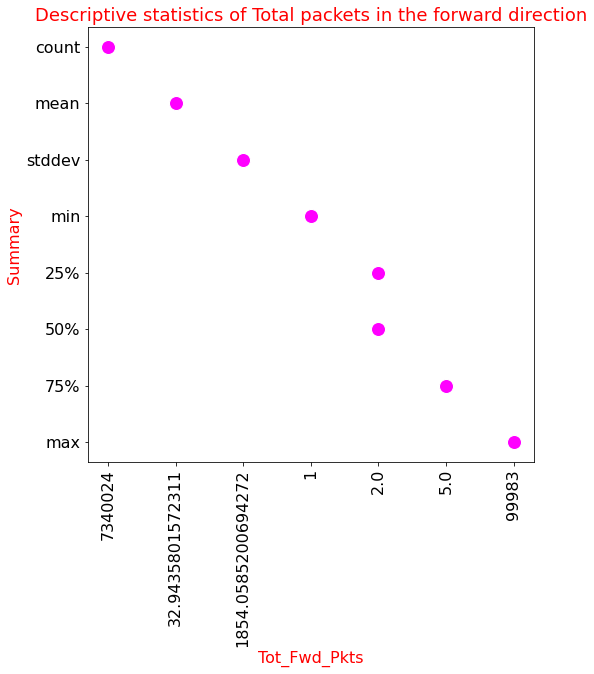

In [ ]:
# Descriptive statistics of a single column Total packets in the forward direction

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x = "Tot_Fwd_Pkts", y = "summary", data = df1,color='magenta',s=200)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Tot_Fwd_Pkts', fontsize=16,color='red')
plt.ylabel('Summary', fontsize=16,color='red')
plt.title('Descriptive statistics of Total packets in the forward direction',fontsize=18,color='red')
plt.show()

**Second Approach of Analytical Method 1 (Numerical Representation)**
# Displaying Percentiles of Counts of Forward and Backward Network Packets 

In [ ]:
# calculating percentiles of five columns 
#percentile is a measurement of spread of data from min to max
#at least 40% value of whole dataset should take 2.0 or less

df3=IDS_df1.summary("40%","60%","80%")
df3.show(truncate=False)

+-------+------------+------------+---------------+---------------+-----------+
|summary|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_Pkts_s |
+-------+------------+------------+---------------+---------------+-----------+
|40%    |2.0         |1.0         |31.0           |0.0            |47.20098178|
|60%    |3.0         |2.0         |97.0           |193.0          |648.7889273|
|80%    |5.0         |4.0         |935.0          |704.0          |4032.258065|
+-------+------------+------------+---------------+---------------+-----------+



**Graphical Representation**

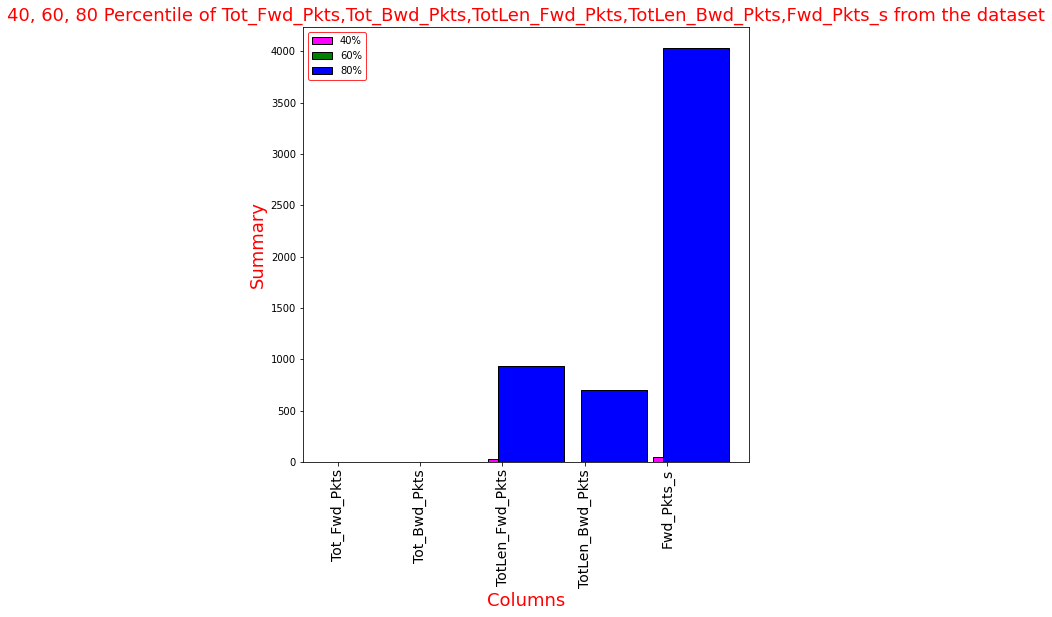

In [ ]:
# Plotting 40%, 60%, 80% of Total packets, total size of packets in the forward and backward direction and number of packets per second

import matplotlib.pyplot as plt
import numpy as np

fields=['Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts','Fwd_Pkts_s']
summary=['40%','60%','80%']
pos = np.arange(len(fields))
bar_width = 0.35
p1=[2.0,1.0,31.0,0.0,47.20098178]
p2=[3.0,2.0,97.0,193.0,648.7889273]
p3=[5.0,4.0,935.0,704.0,4032.258065]
plt.figure(figsize=(8,8))
plt.bar(pos,p1,bar_width,color='magenta',edgecolor='black')
plt.bar(pos+bar_width,p2,color='green',edgecolor='black')
plt.bar(pos+bar_width,p3,color='blue',edgecolor='black')
plt.xticks(pos, fields,fontsize=14,rotation=90)
plt.xlabel('Columns', fontsize=18,color='red')
plt.ylabel('Summary', fontsize=18,color='red')
plt.title('40, 60, 80 Percentile of Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkts_s from the dataset',fontsize=18,color='red')
plt.legend(summary,loc=2,fontsize=10,edgecolor='red')
plt.show()

**Third Approach of Analytical Method 1 (Numerical Representation)**
# Displaying the variance of Number of forward packets per second

In [ ]:
#Calculating variance(Measure of variability) of the column Fwd_Pkts_s by using agg()function and variance keyword and grouping the respective network attacks
#Variance is a statistical measurement of how data is spread out around the mean value in a dataset
#The average of the differences which are squared from the Mean
import pandas as pd

df4=IDS_df.groupby('Label').agg({'Fwd_Pkts_s': 'Variance'}).toPandas()
df4

,Label,variance(Fwd_Pkts_s)
0,SSH-Bruteforce,6.830372e+09
1,Benign,3.797967e+10
2,FTP-BruteForce,1.015710e+11
3,DoS attacks-Slowloris,1.693029e+10
4,DoS attacks-GoldenEye,5.522614e+04
5,DoS attacks-SlowHTTPTest,2.540379e+10
6,DoS attacks-Hulk,4.126514e+07
7,DDOS attack-LOIC-UDP,8.396577e+05
8,DDOS attack-HOIC,2.238267e+07
9,SQL Injection,1.845041e+09


**Graphical Representation 1**

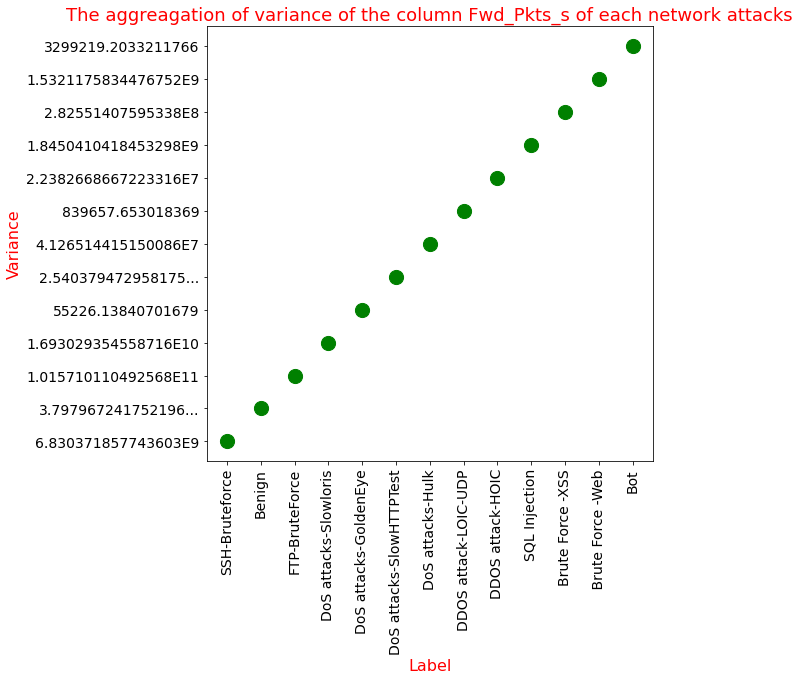

In [ ]:
#Presenting graphically  the aggreagation of variance of the column Fwd_Pkts_s

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

# Creating DataFrame with dictionary
data={"Label":['SSH-Bruteforce','Benign','FTP-BruteForce','DoS attacks-Slowloris','DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','DoS attacks-Hulk','DDOS attack-LOIC-UDP','DDOS attack-HOIC','SQL Injection','Brute Force -XSS',' Brute Force -Web','Bot'],
      "variance(Fwd_Pkts_s)":['6.830371857743603E9','3.797967241752196...','1.015710110492568E11','1.693029354558716E10','55226.13840701679','2.540379472958175...','4.126514415150086E7','839657.653018369','2.2382668667223316E7','1.8450410418453298E9','2.82551407595338E8','1.5321175834476752E9','3299219.2033211766']}
  
df2=pd.DataFrame(data)
df2
plt.figure(figsize=(8,8))
plt.title("The aggreagation of variance of the Number of forward packets of each network attacks",fontsize=18,color='red')
plt.xlabel('Label', fontsize=16,color='red')
plt.ylabel('Variance', fontsize=16,color='red')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(data['Label'],data['variance(Fwd_Pkts_s)'],s=200,color="green")
plt.show()

**Graphical Representation 2**

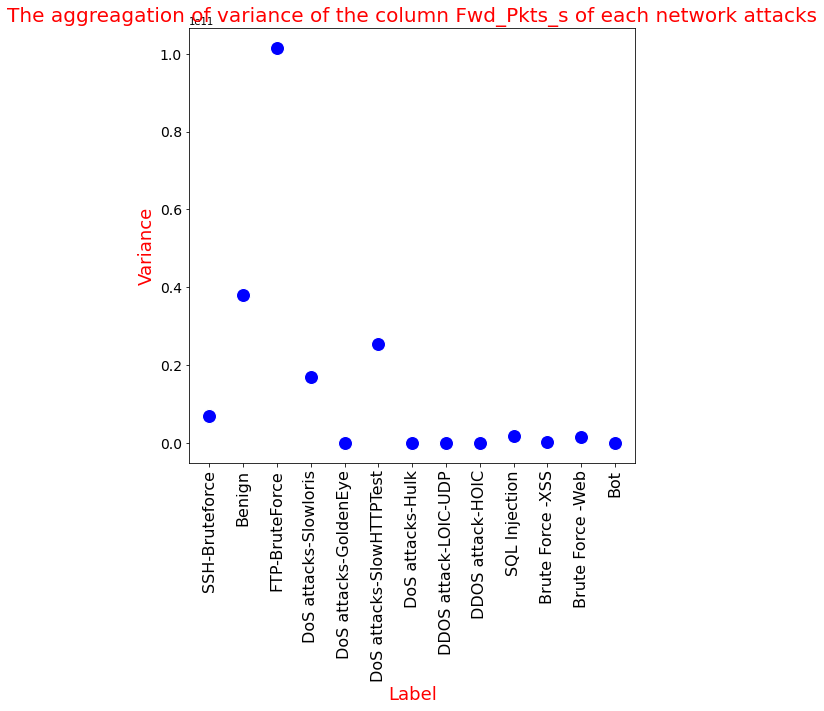

In [ ]:
# plotting the aggreagation of variance of the column Fwd_Pkts_s of each network attacks using seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title("The aggreagation of variance of the column Fwd_Pkts_s of each network attacks",fontsize=20,color='red')
plt.xlabel('Label', fontsize=18,color='red')
plt.ylabel('Variance', fontsize=18,color='red')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=14)
sns.scatterplot(x = "Label", y = "variance(Fwd_Pkts_s)", data = df4,s=200,color='blue')


**Fourth Approach of Analytical Method 1**
# Estimating median of Total time between two Forward Packets

In [ ]:
# Calculating Median of total time between two packets sent in the forward direction for each network attacks
from pyspark.sql import functions as f
import pandas as pd

df5=IDS_df.groupby('Label').agg(f.percentile_approx("Fwd_IAT_Tot", 0.5).alias("Median")).toPandas()
df5

,Label,Median
0,SSH-Bruteforce,115235.0
1,Benign,38945.0
2,FTP-BruteForce,0.0
3,DoS attacks-Slowloris,105003333.0
4,DoS attacks-GoldenEye,4972174.0
5,DoS attacks-SlowHTTPTest,0.0
6,DoS attacks-Hulk,12299.0
7,DDOS attack-LOIC-UDP,120000000.0
8,DDOS attack-HOIC,6310.0
9,SQL Injection,13177.0


**First Approach of Analytical method 2 (Numerical)**
# Calculating Skewness and Kurtosis of Forward and Backward Network packets
## Skewness is used to find out the shape of the data distribution.
## Kurtosis is a measure of outliers in the distribution.


In [ ]:
# Student 2 name and ID     MOUSUMI  CHAUDHURY    2100308
# Analytical method 2:
# Converting the selected features from string to float to calculate skewness,kurtosis and Correlation Matrix

from pyspark.sql.functions import col

IDS_features = ['Tot_Fwd_Pkts','Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts','TotLen_Bwd_Pkts']
IDS_selected_features = IDS_df.select(*(col(y).cast("float").alias(y) for y in IDS_features))



In [ ]:
#Displaying the tabular format of the selected features
IDS_selected_features.show()

+------------+------------+---------------+---------------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|
+------------+------------+---------------+---------------+
|         3.0|         0.0|            0.0|            0.0|
|         3.0|         0.0|            0.0|            0.0|
|         3.0|         0.0|            0.0|            0.0|
|        15.0|        10.0|         1239.0|         2273.0|
|        14.0|        11.0|         1143.0|         2209.0|
|        16.0|        12.0|         1239.0|         2273.0|
|         3.0|         0.0|            0.0|            0.0|
|         3.0|         0.0|            0.0|            0.0|
|         5.0|         3.0|          211.0|          463.0|
|         5.0|         3.0|          220.0|          472.0|
|         5.0|         3.0|          220.0|          472.0|
|         5.0|         3.0|          209.0|          461.0|
|         5.0|         3.0|          211.0|          463.0|
|         5.0|         3.0|          206

**Numerical Representation**

In [ ]:
from pyspark.sql import functions as f

# Calculating the Skewness of Total packets in the forward and backward direction
# The fields are highly skewed(positive skew) with more outliers(right tail)
# Most of the data is at the left and the right tail is longer, then the distribution is skewed right or positively skewed

IDS_selected_features.select(f.skewness(IDS_selected_features['Tot_Fwd_Pkts']),f.skewness(IDS_selected_features['Tot_Bwd_Pkts']),f.skewness(IDS_selected_features['TotLen_Fwd_Pkts']),f.skewness(IDS_selected_features['TotLen_Bwd_Pkts'])).show()



+----------------------+----------------------+-------------------------+-------------------------+
|skewness(Tot_Fwd_Pkts)|skewness(Tot_Bwd_Pkts)|skewness(TotLen_Fwd_Pkts)|skewness(TotLen_Bwd_Pkts)|
+----------------------+----------------------+-------------------------+-------------------------+
|     70.24345812688725|     229.0366983022118|        71.71276259134378|       209.40375255272522|
+----------------------+----------------------+-------------------------+-------------------------+



In [ ]:
# Calculating the Kurtosis of columns Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts
# Distributions are more outlier-prone because the kurtosis is more than zero for all fields
# Distribution has long peak
# Main data is towards left side and outliers are at the right

IDS_selected_features.select(f.kurtosis(IDS_selected_features['Tot_Fwd_Pkts']),f.kurtosis(IDS_selected_features['Tot_Bwd_Pkts']),f.kurtosis(IDS_selected_features['TotLen_Fwd_Pkts']),f.kurtosis(IDS_selected_features['TotLen_Bwd_Pkts'])).show()



+----------------------+----------------------+-------------------------+-------------------------+
|kurtosis(Tot_Fwd_Pkts)|kurtosis(Tot_Bwd_Pkts)|kurtosis(TotLen_Fwd_Pkts)|kurtosis(TotLen_Bwd_Pkts)|
+----------------------+----------------------+-------------------------+-------------------------+
|     5242.849390084716|    102244.46857438656|        5625.841059667944|        80063.93645220244|
+----------------------+----------------------+-------------------------+-------------------------+



**Graphical Representation**

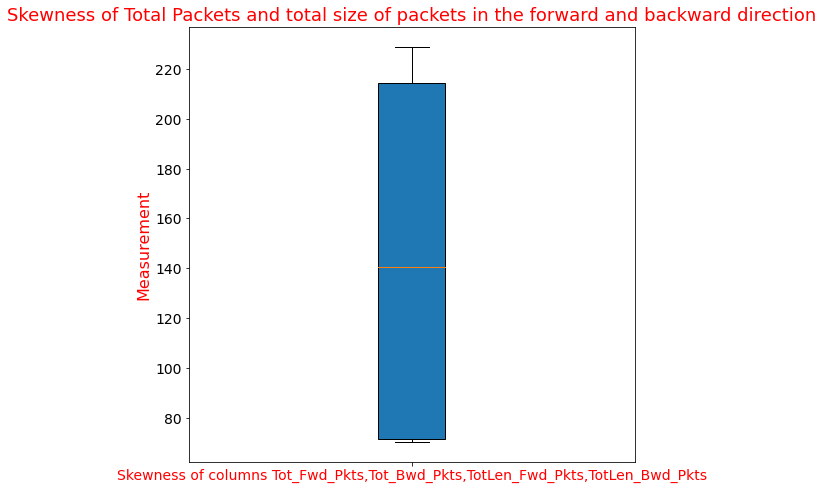

In [ ]:
# plotting the Skewness of Total Packets and total size of packets in the forward and backward direction
import matplotlib.pyplot as plt

Skewness = [70.24345812688725,229.0366983022118,71.71276259134378, 209.40375255272522]
Tot_Plts=[Skewness]
plt.figure(figsize=(8,8))
plt.boxplot(Tot_Plts,patch_artist=True,vert=True, labels=['Skewness of columns Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts'])
plt.title('Skewness of Total Packets and total size of packets in the forward and backward direction',fontsize=18,color='red')
plt.xticks(fontsize=14,color='red')
plt.yticks(fontsize=14)
plt.ylabel('Measurement',fontsize=16,color='red')
plt.show()

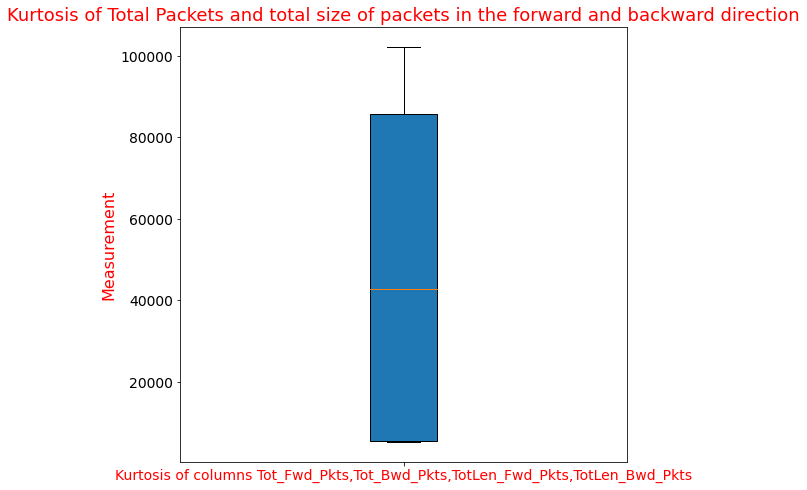

In [ ]:
# plotting the Kurtosis of Total Packets and total size of packets in the forward and backward direction

import matplotlib.pyplot as plt

Kurtosis=[5242.849390084716,102244.46857438656,5625.841059667944,80063.93645220244]
Tot_Plts=[Kurtosis]
plt.figure(figsize=(8,8))
plt.boxplot(Tot_Plts,patch_artist=True,vert=True, labels=['Kurtosis of columns Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts'])
plt.title('Kurtosis of Total Packets and total size of packets in the forward and backward direction',fontsize=18,color='red')
plt.xticks(fontsize=14,color='red')
plt.yticks(fontsize=14)
plt.ylabel('Measurement',fontsize=16,color='red')
plt.show()

**Second Approach of Analytical Method 2 (Numerical Representation )**
# Estimating the first quartile, Second quartile and third quartile of Total Forward and Backward Packets

In [ ]:
# Calculating first quartile(25%), second quartile(50%(median)), third quartile(75%)
#Quartiles are specific percentiles for data analysis
# In the first quartile(25%) only 2.0 total packets passes in the forward direction and 0.0 in the backward direction
#In the third quartile(75%) more  packets pass in the forward direction(5.0) than backward direction(4.0) 

import pandas as pd
from pandas import DataFrame

quantile1=IDS_selected_features.approxQuantile('Tot_Fwd_Pkts',(0.25,0.5,0.75),0.0)
quantile2=IDS_selected_features.approxQuantile('Tot_Bwd_Pkts',(0.25,0.5,0.75),0.0)
Tot_Plts=[quantile1,quantile2]
qua=pd.DataFrame(Tot_Plts)
qua.columns=["25%","50%","75%"]
qua



,25%,50%,75%
0,2.0,2.0,5.0
1,0.0,1.0,4.0


**Graphical Representation**

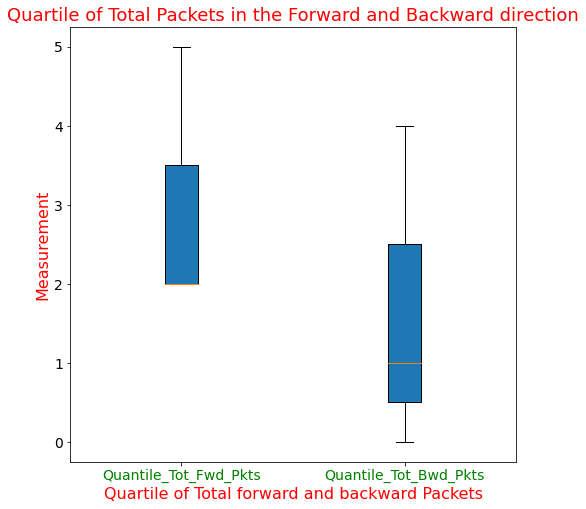

In [ ]:
# plotting quartile of Total Packets in the Forward and Backward direction

import matplotlib.pyplot as plt

quantile1 = [2.0, 2.0, 5.0]
quantile2=[0.0, 1.0, 4.0]
Tot_Plts=[quantile1,quantile2]
plt.figure(figsize=(8,8))
plt.boxplot(Tot_Plts,patch_artist=True,vert=True, labels=['Quantile_Tot_Fwd_Pkts','Quantile_Tot_Bwd_Pkts'])
plt.title('Quartile of Total Packets in the Forward and Backward direction',fontsize=18,color='red')
plt.xlabel('Quartile of Total forward and backward Packets',fontsize=16,color='red')
plt.ylabel('Measurement',fontsize=16,color='red')
plt.xticks(fontsize=14,color='green')
plt.yticks(fontsize=14)
plt.show()

**Random data distribution using density function**
# Data Distribution of total time between two forward packets using density function

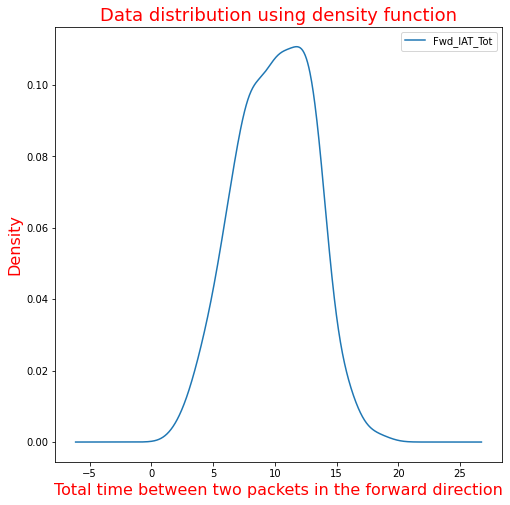

In [ ]:
#Data distribution using density function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generating data randomly from a normal distribution.
a = np.random.normal(10,3,300)
normal_data = pd.DataFrame({'Fwd_IAT_Tot':a})
normal_data.plot(kind = 'density',figsize=(8,8))
plt.title('Data distribution using density function',fontsize=18,color='red')
plt.xlabel('Total time between two packets in the forward direction',fontsize=16,color='red')
plt.ylabel('Density',fontsize=16,color='red')
plt.show()


**First Approach of Analytical Method 3 (Numerical)**
# Correlation Matrix of Total Forward and Backward Packets

In [ ]:
# Student 2 name and ID :  MOUSUMI  CHAUDHURY  2100308
# Analytical method 3:

#Calculating Correlation Matrix of 'Tot_Fwd_Pkts','Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts','TotLen_Bwd_Pkts'
#Correlation is a statistical relation that analyzes the relationship between two variables or two columns

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convert the desired column to vector column first
vector_col = "selected_correlation_features"
assemble = VectorAssembler(inputCols=IDS_selected_features.columns, outputCol=vector_col)
dataframe_vector = assemble.transform(IDS_selected_features).select(vector_col)
dataframe_vector.show()


+-----------------------------+
|selected_correlation_features|
+-----------------------------+
|                (4,[0],[3.0])|
|                (4,[0],[3.0])|
|                (4,[0],[3.0])|
|         [15.0,10.0,1239.0...|
|         [14.0,11.0,1143.0...|
|         [16.0,12.0,1239.0...|
|                (4,[0],[3.0])|
|                (4,[0],[3.0])|
|         [5.0,3.0,211.0,46...|
|         [5.0,3.0,220.0,47...|
|         [5.0,3.0,220.0,47...|
|         [5.0,3.0,209.0,46...|
|         [5.0,3.0,211.0,46...|
|         [5.0,3.0,206.0,45...|
|         [5.0,3.0,211.0,46...|
|         [5.0,3.0,211.0,46...|
|         [5.0,3.0,214.0,46...|
|         [5.0,3.0,209.0,46...|
|         [5.0,3.0,215.0,46...|
|         [5.0,3.0,215.0,46...|
+-----------------------------+
only showing top 20 rows



In [ ]:
# Defining the pearson corrrelation matrix 
Corr_matrix = Correlation.corr(dataframe_vector, vector_col)



In [ ]:
# Printing the correlation matrix
correlation = Corr_matrix.collect()[0][Corr_matrix.columns[0]].toArray()
print(correlation)

[[1.         0.02771365 0.97783187 0.02755702]
 [0.02771365 1.         0.00711368 0.99810679]
 [0.97783187 0.00711368 1.         0.00206391]
 [0.02755702 0.99810679 0.00206391 1.        ]]


**Graphical Representation**

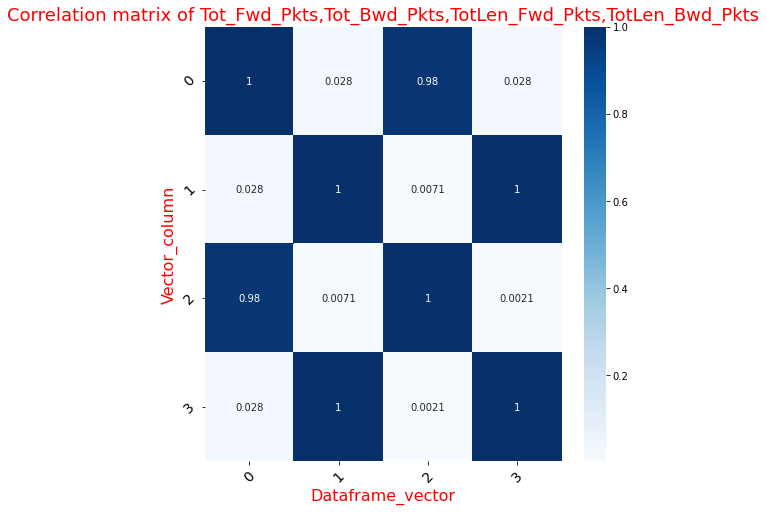

In [ ]:
# plotting the correlation matrix 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True,cmap=plt.cm.Blues)
plt.title('Correlation matrix of Forward and Backward Packets',fontsize=18,color='red')
plt.xlabel('Dataframe_vector', fontsize=16,color='red')
plt.ylabel('Vector_column', fontsize=16,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()

**Second Approach of Analytical method 3**
# Covariance of Total size of packets in the Forward and Backward direction

In [ ]:
# Calculating the covariance of the columns 'TotLen_Fwd_Pkts','TotLen_Bwd_Pkts'

from pyspark.sql.functions import col

IDS_features = ['TotLen_Fwd_Pkts','TotLen_Bwd_Pkts']
IDS_selected_features = IDS_df.select(*(col(y).cast("float").alias(y) for y in IDS_features))


In [ ]:
#printing the covariance
covariance=IDS_selected_features.cov('TotLen_Fwd_Pkts','TotLen_Bwd_Pkts')
print(covariance)

30613069.666759413


**Machine Learning Technique using Pyspark**
# Multilayer perceptron classifier 
## It is a classifier based on the feedforward artificial neural network. It conatins multiple layers of nodes. Input Layer nodes represent the input data. Intermediate layer nodes utilizes sigmoid function and output layer uses Softmax function.

In [ ]:
# Student 2 name and ID:          MOUSUMI CHAUDHURY     2100308
# Machine Learning Technique:     Multilayer perceptron classifier
# What to achieve:  To classify the network attacks based on few features of the dataset
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data set
data = spark.read.format("csv")\
 .load("/content/drive/MyDrive/IDS2018_rdd")



In [ ]:
data.show(5)

In [ ]:
rename_data = data.withColumnRenamed("_c0","Dst_Port") \
    .withColumnRenamed("_c1","Protocol")\
    .withColumnRenamed("_c2","Timestamp")\
    .withColumnRenamed("_c3","Flow_Duration")\
    .withColumnRenamed("_c4","Tot_Fwd_Pkts")\
    .withColumnRenamed("_c5","Tot_Bwd_Pkts")\
    .withColumnRenamed("_c6","TotLen_Fwd_Pkts")\
    .withColumnRenamed("_c7","TotLen_Bwd_Pkts")\
    .withColumnRenamed("_c8","Fwd_Pkt_Le_Max")\
    .withColumnRenamed("_c9","Fwd_Pkt_Len_Min")\
    .withColumnRenamed("_c10","Fwd_Pkt_Len_Mean")\
    .withColumnRenamed("_c11","Fwd_Pkt_Len_Std")\
    .withColumnRenamed("_c12","Bwd_Pkt_Len_Max")\
    .withColumnRenamed("_c13","Bwd_Pkt_Len_Min")\
    .withColumnRenamed("_c14","Bwd_Pkt_Len_Mean")\
    .withColumnRenamed("_c15","Bwd_Pkt_Len_Std")\
    .withColumnRenamed("_c16","Flow_Byts_s")\
    .withColumnRenamed("_c17","Flow_Pkts_s")\
    .withColumnRenamed("_c18","Flow_IAT_Mean")\
    .withColumnRenamed("_c19","Flow_IAT_Std")\
    .withColumnRenamed("_c20","Flow_IAT_Max")\
    .withColumnRenamed("_c21","Flow_IAT_Min")\
    .withColumnRenamed("_c22","Fwd_IAT_Tot")\
    .withColumnRenamed("_c23","Fwd_IAT_Mean")\
    .withColumnRenamed("_c24","Fwd_IAT_Std")\
    .withColumnRenamed("_c25","Fwd_IAT_Max")\
    .withColumnRenamed("_c26","Fwd_IAT_Min")\
    .withColumnRenamed("_c27","Bwd_IAT_Tot")\
    .withColumnRenamed("_c28","Bwd_IAT_Mean")\
    .withColumnRenamed("_c29","Bwd_IAT_Std")\
    .withColumnRenamed("_c30","Bwd_IAT_Max")\
    .withColumnRenamed("_c31","Bwd_IAT_Min")\
    .withColumnRenamed("_c32","Fwd_PSH_Flags")\
    .withColumnRenamed("_c33","Bwd_PSH_Flags")\
    .withColumnRenamed("_c34","Fwd_URG_Flags")\
    .withColumnRenamed("_c35","Bwd_URG_Flags")\
    .withColumnRenamed("_c36","Fwd_Header_Len")\
    .withColumnRenamed("_c37","Bwd_Header_Len")\
    .withColumnRenamed("_c38","Fwd_Pkts_s")\
    .withColumnRenamed("_c39","Bwd_Pkts_s")\
    .withColumnRenamed("_c40","Pkt_Len_Min")\
    .withColumnRenamed("_c41","Pkt_Len_Max")\
    .withColumnRenamed("_c42","Pkt_Len_Mean")\
    .withColumnRenamed("_c43","Pkt_Len_Std")\
    .withColumnRenamed("_c44","Pkt_Len_Var")\
    .withColumnRenamed("_c45","FIN_Flag_Cnt")\
    .withColumnRenamed("_c46","SYN_Flag_Cnt")\
    .withColumnRenamed("_c47","RST_Flag_Cnt")\
    .withColumnRenamed("_c48","PSH_Flag_Cnt")\
    .withColumnRenamed("_c49","ACK_Flag_Cnt")\
    .withColumnRenamed("_c50","URG_Flag_Cnt")\
    .withColumnRenamed("_c51","CWE_Flag_Count")\
    .withColumnRenamed("_c52","ECE_Flag_Cnt")\
    .withColumnRenamed("_c53","Down_Up_Ratio")\
    .withColumnRenamed("_c54","Pkt_Size_Avg")\
    .withColumnRenamed("_c55","Fwd_Seg_Size_Avg")\
    .withColumnRenamed("_c56","Bwd_Seg_Size_Avg")\
    .withColumnRenamed("_c57","Fwd_Byts_b_Avg")\
    .withColumnRenamed("_c58","Fwd_Pkts_b_Avg")\
    .withColumnRenamed("_c59","Fwd_Blk_Rate_Avg")\
    .withColumnRenamed("_c60","Bwd_Byts_b_Avg")\
    .withColumnRenamed("_c61","Bwd_Pkts_b_Avg")\
    .withColumnRenamed("_c62","Bwd_Blk_Rate_Avg")\
    .withColumnRenamed("_c63","Subflow_Fwd_Pkts")\
    .withColumnRenamed("_c64","Subflow_Fwd_Byts")\
    .withColumnRenamed("_c65","Subflow_Bwd_Pkts")\
    .withColumnRenamed("_c66","Subflow_Bwd_Byts")\
    .withColumnRenamed("_c67","Init_Fwd_Win_Byts")\
    .withColumnRenamed("_c68","Init_Bwd_Win_Byts")\
    .withColumnRenamed("_c69","Fwd_Act_Data_Pkts")\
    .withColumnRenamed("_c70","Fwd_Seg_Size_Min")\
    .withColumnRenamed("_c71","Active_Mean")\
    .withColumnRenamed("_c72","Active_Std")\
    .withColumnRenamed("_c73","Active_Max")\
    .withColumnRenamed("_c74","Active_Min")\
    .withColumnRenamed("_c75","Idle_Mean")\
    .withColumnRenamed("_c76","Idle_Std")\
    .withColumnRenamed("_c77","Idle_Max")\
    .withColumnRenamed("_c78","Idle_Min")\
    .withColumnRenamed("_c79","Label")

In [ ]:
rename_data.show()

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+--------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------

In [ ]:
# Dropping the null values from the dataset
rename_data = rename_data.na.drop()
rename_data.show()

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+--------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------

In [ ]:
# Selected columns for the classification problem

df1=rename_data.select('Label','Tot_Fwd_Pkts','Tot_Bwd_Pkts','TotLen_Fwd_Pkts','TotLen_Bwd_Pkts','Fwd_IAT_Min','Fwd_IAT_Tot')
df1.show(truncate=False)

+------+------------+------------+---------------+---------------+-----------+-----------+
|Label |Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min|Fwd_IAT_Tot|
+------+------------+------------+---------------+---------------+-----------+-----------+
|Benign|3           |0           |0              |0              |56320761   |112641719  |
|Benign|3           |0           |0              |0              |56320652   |112641466  |
|Benign|3           |0           |0              |0              |56319098   |112638623  |
|Benign|15          |10          |1239           |2273           |229740     |6453966    |
|Benign|14          |11          |1143           |2209           |246924     |8804066    |
|Benign|16          |12          |1239           |2273           |265831     |6989341    |
|Benign|3           |0           |0              |0              |56320096   |112640480  |
|Benign|3           |0           |0              |0              |56320578   |112641244  |

In [ ]:
# checking the data types of the selected columns
df1.printSchema()

root
 |-- Label: string (nullable = true)
 |-- Tot_Fwd_Pkts: string (nullable = true)
 |-- Tot_Bwd_Pkts: string (nullable = true)
 |-- TotLen_Fwd_Pkts: string (nullable = true)
 |-- TotLen_Bwd_Pkts: string (nullable = true)
 |-- Fwd_IAT_Min: string (nullable = true)
 |-- Fwd_IAT_Tot: string (nullable = true)



In [ ]:
# Type casting the columns from String to float

from pyspark.sql.functions import col

df1= df1.select(col('Tot_Fwd_Pkts').cast('float'),
                col('Tot_Bwd_Pkts').cast('float'), 
                col('Label'), 
                col('TotLen_Fwd_Pkts').cast('float'), 
                col('TotLen_Bwd_Pkts').cast('float'), 
                col('Fwd_IAT_Min').cast('float'), 
                col('Fwd_IAT_Tot').cast('float'),)


df1.show()

+------------+------------+------+---------------+---------------+-----------+------------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts| Label|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min| Fwd_IAT_Tot|
+------------+------------+------+---------------+---------------+-----------+------------+
|         3.0|         0.0|Benign|            0.0|            0.0| 5.632076E7| 1.1264172E8|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6320652E7|1.12641464E8|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6319096E7|1.12638624E8|
|        15.0|        10.0|Benign|         1239.0|         2273.0|   229740.0|   6453966.0|
|        14.0|        11.0|Benign|         1143.0|         2209.0|   246924.0|   8804066.0|
|        16.0|        12.0|Benign|         1239.0|         2273.0|   265831.0|   6989341.0|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6320096E7| 1.1264048E8|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6320576E7|1.

In [ ]:
# Indexing String column into vector column
from pyspark.ml.feature import StringIndexer

df1 = StringIndexer(inputCol='Label', outputCol='Attacks', handleInvalid='keep').fit(df1).transform(df1)


df1.show()

+------------+------------+------+---------------+---------------+-----------+------------+-------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts| Label|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min| Fwd_IAT_Tot|Attacks|
+------------+------------+------+---------------+---------------+-----------+------------+-------+
|         3.0|         0.0|Benign|            0.0|            0.0| 5.632076E7| 1.1264172E8|    0.0|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6320652E7|1.12641464E8|    0.0|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6319096E7|1.12638624E8|    0.0|
|        15.0|        10.0|Benign|         1239.0|         2273.0|   229740.0|   6453966.0|    0.0|
|        14.0|        11.0|Benign|         1143.0|         2209.0|   246924.0|   8804066.0|    0.0|
|        16.0|        12.0|Benign|         1239.0|         2273.0|   265831.0|   6989341.0|    0.0|
|         3.0|         0.0|Benign|            0.0|            0.0|5.6320096E7| 1.1264048E8|    0.0|


In [ ]:
# Checking the schema of the modified columns
df1.dtypes

[('Tot_Fwd_Pkts', 'float'),
 ('Tot_Bwd_Pkts', 'float'),
 ('Label', 'string'),
 ('TotLen_Fwd_Pkts', 'float'),
 ('TotLen_Bwd_Pkts', 'float'),
 ('Fwd_IAT_Min', 'float'),
 ('Fwd_IAT_Tot', 'float'),
 ('Attacks', 'double')]

In [ ]:
# Dropping String columns

df1 = df1.drop('Label')


df1.show()

+------------+------------+---------------+---------------+-----------+------------+-------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min| Fwd_IAT_Tot|Attacks|
+------------+------------+---------------+---------------+-----------+------------+-------+
|         3.0|         0.0|            0.0|            0.0| 5.632076E7| 1.1264172E8|    0.0|
|         3.0|         0.0|            0.0|            0.0|5.6320652E7|1.12641464E8|    0.0|
|         3.0|         0.0|            0.0|            0.0|5.6319096E7|1.12638624E8|    0.0|
|        15.0|        10.0|         1239.0|         2273.0|   229740.0|   6453966.0|    0.0|
|        14.0|        11.0|         1143.0|         2209.0|   246924.0|   8804066.0|    0.0|
|        16.0|        12.0|         1239.0|         2273.0|   265831.0|   6989341.0|    0.0|
|         3.0|         0.0|            0.0|            0.0|5.6320096E7| 1.1264048E8|    0.0|
|         3.0|         0.0|            0.0|            0.0|5.6320576E7

In [ ]:
# Assembling the selected features of the model with VectorAssembler

selected_features = ['Tot_Fwd_Pkts',
                    'Tot_Bwd_Pkts',
                    'TotLen_Fwd_Pkts',
                     'TotLen_Bwd_Pkts',
                     'Fwd_IAT_Min',
                     'Fwd_IAT_Tot'
                     ]
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=selected_features, outputCol='features')

transformed_data = assembler.transform(df1)

transformed_data.show()

+------------+------------+---------------+---------------+-----------+------------+-------+--------------------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min| Fwd_IAT_Tot|Attacks|            features|
+------------+------------+---------------+---------------+-----------+------------+-------+--------------------+
|         3.0|         0.0|            0.0|            0.0| 5.632076E7| 1.1264172E8|    0.0|[3.0,0.0,0.0,0.0,...|
|         3.0|         0.0|            0.0|            0.0|5.6320652E7|1.12641464E8|    0.0|[3.0,0.0,0.0,0.0,...|
|         3.0|         0.0|            0.0|            0.0|5.6319096E7|1.12638624E8|    0.0|[3.0,0.0,0.0,0.0,...|
|        15.0|        10.0|         1239.0|         2273.0|   229740.0|   6453966.0|    0.0|[15.0,10.0,1239.0...|
|        14.0|        11.0|         1143.0|         2209.0|   246924.0|   8804066.0|    0.0|[14.0,11.0,1143.0...|
|        16.0|        12.0|         1239.0|         2273.0|   265831.0|   6989341.0|    

In [ ]:
# Splitting the data into train set and test set
splits = transformed_data.randomSplit([0.8, 0.2], 1234)
train = splits[0]
test = splits[1]
#Counting the train and test set
train.count(), test.count(), df1.count()

(5871968, 1468056, 7340024)

In [ ]:
train.show(5)

+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min|Fwd_IAT_Tot|Attacks|           features|
+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
+------------+------------+---------------+---------------+-----------+-----------+-------+-------------

In [ ]:
test.show(5)

+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min|Fwd_IAT_Tot|Attacks|           features|
+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|
+------------+------------+---------------+---------------+-----------+-----------+-------+-------------

In [ ]:
# specifying layers for the multilayer perceptron neural network:
# input layer of size 6 (input features), two intermediate layers of size 8 and 7
#  output layer of size 14 (classes)
layers = [6, 8, 7, 14]

In [ ]:
# creating the trainer and its parameters
trainer = MultilayerPerceptronClassifier(labelCol='Attacks', featuresCol='features',maxIter=50, layers=layers, blockSize=50, seed=1234)

In [ ]:
# training the neural network model
model = trainer.fit(train)


In [ ]:

predictionstest = model.transform(test)
p1=predictionstest.select("prediction","Attacks")
p1.show()


+----------+-------+
|prediction|Attacks|
+----------+-------+
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
|       0.0|    0.0|
+----------+-------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='Attacks', 
    predictionCol='prediction', 
    metricName='accuracy')

In [ ]:
# Compute the accuracy of the model on the test set
accuracy = evaluator.evaluate(predictionstest)
print('Test Accuracy = '+str(accuracy))

Test Accuracy = 0.7267195529325857


In [ ]:
predictions_train = model.transform(train)
predictions_train.show(5)

+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+--------------------+--------------------+----------+
|Tot_Fwd_Pkts|Tot_Bwd_Pkts|TotLen_Fwd_Pkts|TotLen_Bwd_Pkts|Fwd_IAT_Min|Fwd_IAT_Tot|Attacks|           features|       rawPrediction|         probability|prediction|
+------------+------------+---------------+---------------+-----------+-----------+-------+-------------------+--------------------+--------------------+----------+
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|[3.53302945715097...|[0.46370752076525...|       0.0|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|[3.53302945715097...|[0.46370752076525...|       0.0|
|         1.0|         1.0|            0.0|            0.0|        0.0|        0.0|    0.0|(6,[0,1],[1.0,1.0])|[3.53302945715097...|[0.46370752076525...|       0.0|
|         

In [ ]:
# Action on actual and predicted level
true = predictions_train.select(['Attacks']).collect()
pred = predictions_train.select(['Prediction']).collect()

In [ ]:
# Finding the classification report
import sklearn 
from sklearn.metrics import classification_report, confusion_matrix
df=classification_report(true, pred)
print(df)


In [ ]:
# Calculating the confusion matrix
mat=confusion_matrix(true, pred)
print(mat)

In [ ]:
#Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plot=sns.heatmap(mat,square=True, annot=True,cbar=True,cmap=plt.cm.Blues)
plot.set_title('Confusion Matrix of Multilayer Perceptron Classifier',fontsize=18,color='red')
plot.set_xlabel('Actual Level', fontsize=18,color='red')
plot.set_ylabel('Prediction Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()